# K-Nearest Neighour Classifier
>dataset link : https://www.kaggle.com/datasets/akram24/social-network-ads
<br><br>

### Importing Libraries
* `numpy` is used for numerical operations in Python.
* `pandas` is used for data manipulation and analysis.
* `matplotlib.pyplot` is used for creating visualizations.
* `plotly.graph_objs` is used for creating 3D scatter plots.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<br>

### Loading and Preprocessing Data
* Reads a CSV file into a pandas DataFrame.
* Converts the "Gender" column into dummy variables (one-hot encoding).
* Drops unnecessary columns ("Gender", "User ID", "Female") from the DataFrame.
* Renames the remaining dummy variable column ("Male") to "Gender".

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data = pd.concat([data, pd.get_dummies(data["Gender"]).astype(int)], axis=1).drop(["Gender","User ID","Female"], axis=1)
data.rename(columns={'Male': 'Gender'}, inplace=True)

<br>

### Data Preview
* Displays the first few rows of the preprocessed DataFrame.

In [3]:
data.head()

,Age,EstimatedSalary,Purchased,Gender
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


<br>

### Correlation Analysis
* Calculates the correlation matrix using np.corrcoef().
* Creates a heatmap of the correlation matrix using seaborn's heatmap function.
* Displays the heatmap with annotations and formatted values.
* Sets the tick labels for better readability.
* Displays the title "Correlation Heatmap of Features".

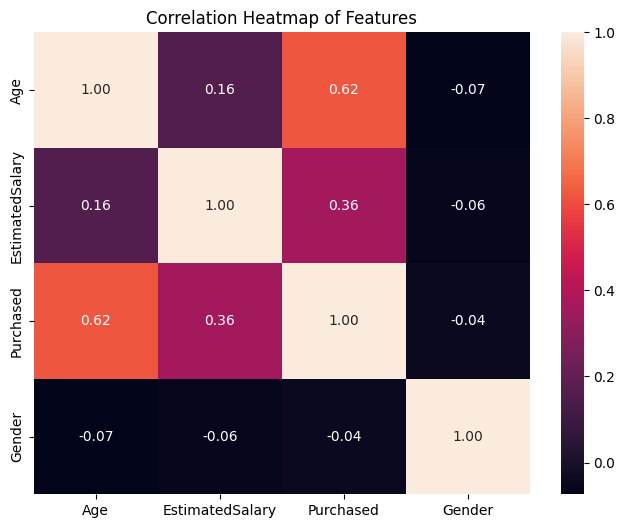

In [4]:
correlation_matrix = np.corrcoef(data, rowvar=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
           xticklabels=['Age', 'EstimatedSalary', 'Purchased', 'Gender'],
            yticklabels=['Age', 'EstimatedSalary', 'Purchased', 'Gender'])
plt.title('Correlation Heatmap of Features')
plt.show()

<br>

### Dropping Unnecessary Column
* Drops the "Gender" column from the DataFrame since it has the least correlation with the "Purchased" column, which is the target column.

In [5]:
data = data.drop(['Gender'], axis=1)

<br>

### Data Preview
* Displays the first few rows of the DataFrame after dropping the "Gender" column.

In [6]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<br>

### Data Preparation for Modeling
* Creates feature matrix X by dropping the "Purchased" column from the DataFrame and converting it to a NumPy array.
* Creates target vector y containing the values of the "Purchased" column as a NumPy array.

In [7]:
X = data.drop(['Purchased'], axis=1).to_numpy()
y = data['Purchased'].to_numpy()

<br>

### Train-Test Split
* Splits the data into training and testing sets using train_test_split() function from sklearn.model_selection.
* Uses a test size of 33% and sets a random state for reproducibility.
* X_train and y_train represent the features and target variables for training, respectively.
* X_test and y_test represent the features and target variables for testing, respectively.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<br>

### Feature Scaling
* Performs feature scaling using StandardScaler from sklearn.preprocessing.
* Standardizes the feature variables in both training and testing sets.


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<br>

### Accuracy Calculation Function
* Defines a function `accuracy_score` to calculate the accuracy of predictions.
* Takes two arguments: `y_pred`, the predicted labels, and `y_test`, the true labels.
* Calculates accuracy as the proportion of correct predictions.


In [10]:
def accuracy_score (y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

<br>

### K-Nearest Neighbors (KNN) Algorithm Implementation
* Defines a function `KNearestNeighbours` to perform K-Nearest Neighbors classification.
* Takes four arguments: `k`, the number of neighbors; `X_train` and `Y_train`, the feature and target variables for training, respectively; and `X_test`, the feature variables for testing.
* Iterates through each test point in `X_test` and calculates the distances to all training points using Euclidean distance.
* Finds the `k` nearest neighbors based on distance.
* Determines the most common class among the nearest neighbors and assigns it to the corresponding test point.
* Returns an array of predicted labels for the test data.

In [11]:
def KNearestNeighbours(k, X_train, Y_train, X_test):
    Y_pred = []
    
    for test_point in X_test:
        distances = np.linalg.norm(X_train - test_point, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        nearest_classes = Y_train[nearest_indices]
        unique_elements, counts = np.unique(nearest_classes, return_counts=True)
        most_common_class = unique_elements[np.argmax(counts)]
        Y_pred.append(most_common_class)
    
    return np.array(Y_pred)

<br>

### KNN Classifier Performance Analysis
* Evaluates the performance of the K-Nearest Neighbors (KNN) classifier for different values of k.
* Iterates through values of k from 1 to 20.
* For each value of k, predicts labels for the test data using the `KNearestNeighbours` function.
* Calculates the accuracy of predictions using the `accuracy_score` function.
* Plots the accuracy versus k to visualize the relationship between k and classifier performance.

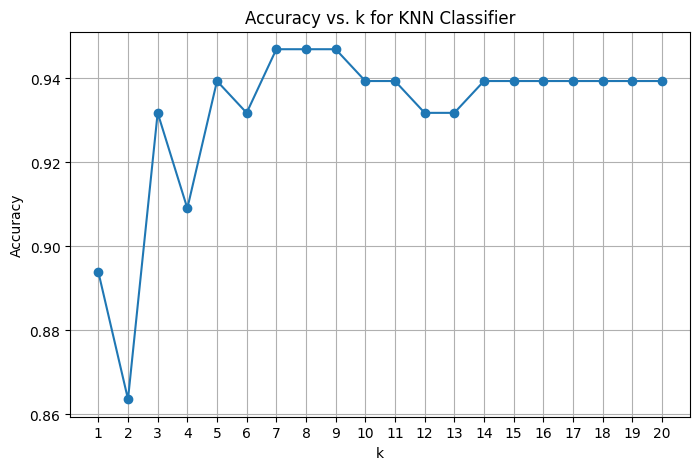

In [12]:
k_values = range(1, 21)

accuracies = []

for k in k_values:
    y_pred = KNearestNeighbours(k, X_train, y_train, X_test)

    acc = accuracy_score (y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. k for KNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

<br>

### Best k Selection
* Determines the best value of k based on the highest accuracy achieved.
* Finds the index of the maximum accuracy in the `accuracies` array.
* Retrieves the corresponding value of k from the `k_values` array.

In [13]:
best_k = k_values[np.argmax(accuracies)]

<br>

### Making Predictions with Best k
* Makes predictions on the test data using the best value of k determined previously.
* Calls the `KNearestNeighbours` function with the best value of k.
* Generates predictions for the test data.


In [14]:
predictions = KNearestNeighbours(best_k, X_train, y_train, X_test)

<br>

### Confusion Matrix Visualization
* Constructs a confusion matrix using pd.crosstab() to compare actual and predicted labels.
* Displays the confusion matrix as a heatmap using seaborn's heatmap function.
* Includes annotations and formats the values as integers.
* Sets the tick labels for better interpretation.


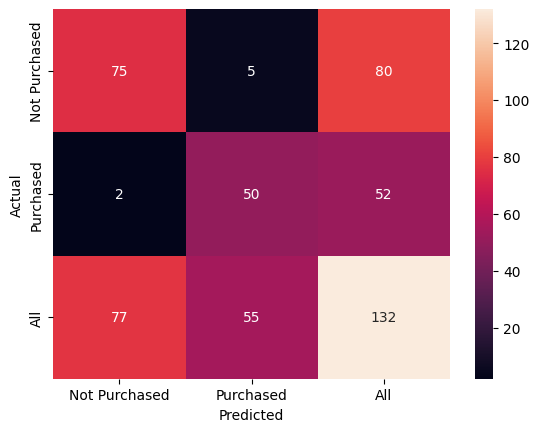

In [15]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.0f',
            xticklabels=['Not Purchased', 'Purchased', 'All'],
            yticklabels=['Not Purchased', 'Purchased', 'All'])
plt.show()

<br>

### Accuracy Calculation
* Calculates the accuracy of predictions using the `accuracy_score` function.
* Prints the accuracy value.


In [16]:
acc1 = accuracy_score (y_test, predictions)
print("Accuracy:", acc1)

Accuracy: 0.946969696969697
